#Introduction to neural network classcification with TensorFlow

In this notebook we are going to write how to write neural network for classcification problems 

A classcification problem is where you try to classcify something as one thing or another thing 

A few types of classcification problem:
* Binary classcification 
* Multiclass classcification
* Multilabel classcificatiom

## Creating a data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make a 1000 example 
n_samples=1000

# Create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)


In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand right now...lets visulize it !

In [4]:
# Shape of X
X.shape

(1000, 2)

In [5]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

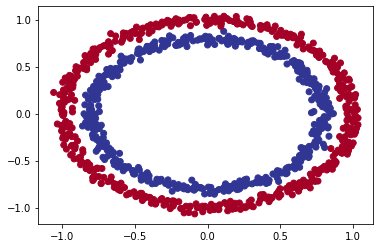

In [7]:
# Visulaize it with plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

🛠**Exercise:** before pushing forward ,spend 10-minutes playing around with  [playground.tensorflow.org](https://playground.tensorflow.org/#activation=sigmoid&regularization=L1&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0.001&noise=0&networkShape=2&seed=0.01601&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural network .See what happen when you change different hyperparameters.

## Input and Output Shape

In [8]:
# Check the shape of our feature and labels
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [10]:
# View the examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modeling with tensorflow are typically :
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweek
6. Evaluate...


In [11]:
  !pip install tensorflow==2.3.0
  !pip install keras==2.3.0

     |████████████████████████████████| 320.4 MB 41 kB/s 
     |████████████████████████████████| 20.1 MB 8.9 MB/s 
     |████████████████████████████████| 2.9 MB 45.5 MB/s 
     |████████████████████████████████| 459 kB 61.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
 

     |████████████████████████████████| 377 kB 9.5 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [12]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [13]:

# Random Seed
tf.random.set_seed(42)

# 1. Create a model
model_1=tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fit the model
model_1.fit(X,y,epochs=5)


Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 986us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 855us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 925us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [14]:
# Lets try and improve our model for longer..
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working on binary classcification problem and our model is getting around ~50% accuracy and it is performing as it is guessing .

So lets step things up a notch and add an extra layer.

In [15]:
# set the random seed 
tf.random.set_seed(42)
# 1. Create a model
model_2=tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [16]:
# evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [17]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving the model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer. 
2. Compile a model - here we might to choose a differnt optimization function such as Adam instead of SGD 
3. Fit a model -perhaps we might fit our model for more epochs (leave it training for longer).
 


In [18]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add 100 dense neuran
    tf.keras.layers.Dense(10),  # add aother layer with 10 neurons 
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [19]:
# Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

🔑 **Note :** Whenever your model is performing strangly or there is something going on with your data you are not quite sure of, remember these three words **visualize , visulazie , visualize** . Inspect your data , inspect your model , inspect your model prediction.

To visulaize our model's prediction , let's create a function `plot_decision_boundary()` this function will:
* Take in a trained model , features (X) and labels (y) 
* Create a  [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different X values
* Make the prediction accross the meshgrid 
* plot the pridiction as well as the line between zones ( where each unique class falls).


In [20]:
import numpy as np

In [21]:
def plot_decision_boundary(model , X , y):
  """
  Plots the decision boundry created by a model predicting on X.
  This function is inspired by three resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/09_Data_Quality.ipynb
  3. https://github.com/GokuMohandas/MadeWithML
  """
  # Define the axis boundry of the plot and create a mesh grid 
  x_min , x_max = X[:,0].min()-0.1  , X[:,0].max()+0.1
  y_min , y_max = X[:,1].min()-0.1  , X[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  
  # Create a X values (we are going to make pridiction on these)
  x_in  = np.c_[xx.ravel(),yy.ravel()] # stack 2D array

  # Make Prediction
  y_pred=model.predict(x_in)
  
  # Check  for multi-class
  if len(y_pred[0])>1:
    print("doing multi-class classcification")
    # we have reshape our prediction to get them ready for ploting 
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classcification")
    y_pred=np.round(y_pred).reshape(xx.shape)

  # plot the decision boundry
  plt.contourf(xx ,  yy , y_pred  ,  cmap=plt.cm.RdYlBu , alpha=0.7)
  plt.scatter(X[:,0]  , X[:,1]  , c=y , s=40  , cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

doing binary classcification


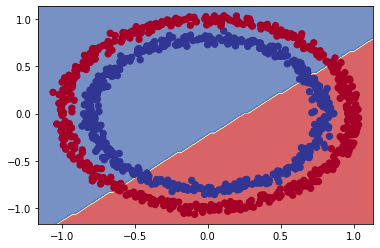

In [22]:
# Check out the prediction our model is making 
plot_decision_boundary(model=model_3  , X=X , y=y)

In [23]:
# lets see if our model can be used for regression problem....

tf.random.set_seed(42)

# Create some regression data
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5) # y=x+100

# Split our data into training and test sets
X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]

# fit the model
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: ignored

oh wait... we compiled our model for binary classcification problem .

But...we are now working on the regression problem.  let's change the model to suit our data. 

In [24]:
# set random seed
tf.random.set_seed(42)

# 1. create a model
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model - this time regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. fit the model
model_4.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

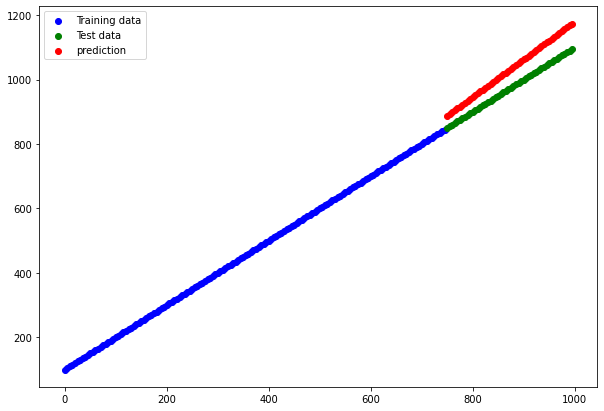

In [25]:
# Make prediction with our trained model
y_reg_pred=model_4.predict(X_reg_test)

# plot the model predictions against our regression data
plt.figure (figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test,y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test,y_reg_pred, c="r", label="prediction")
plt.legend()



## The missing piece : Non-linearity

In [26]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,tf.keras.activations.linear)
])

# 2. Compile a model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. fit the model
history=model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 997us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 896us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 885us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 884us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 987us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 949us/step - loss: 3.7419 - accuracy: 0.42

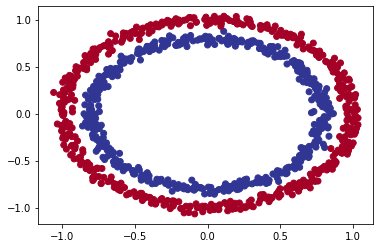

In [27]:
# check our data 
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classcification


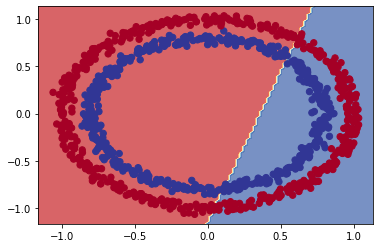

In [28]:
# Check the decision boundry for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with non-linear activation function.

In [29]:
from tensorflow.python.keras.optimizers import Optimizer
#  set a random  seed
tf.random.set_seed(42)

# 1. Create a model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1,tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# 3. fit the model
model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 905us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 956us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 965us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7419 - accuracy: 0.4220
Epo

In [30]:
# Time to replicate the multi-layer neural network from TensorFlow playground in codel....

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
])

# 2. compile a model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. fit the model
history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 970us/step - loss: 3.2091 - accuracy: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 978us/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/100
32/32 [==============================] - 0s 966us/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/100
32/32 [==============================] - 0s 985us/step - loss: 1.6530 - accuracy: 0.1220
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5982 - accuracy: 0.1320
Epoch 9/100
32/32 [==============================] - 0s 987us/step - loss: 1.5331 - accuracy: 0.1440
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4113 - accuracy: 0.1490

In [31]:
# Evaluate the model_7
model_7.evaluate(X,y)

32/32 [==============================] - 0s 932us/step - loss: 0.6643 - accuracy: 0.3780


[0.6642988324165344, 0.3779999911785126]

doing multi-class classcification


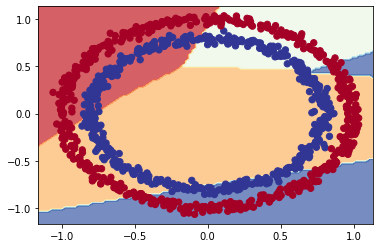

In [32]:
# How do our pridiction look like
plot_decision_boundary(model=model_7,X=X,y=y)

In [33]:
from tensorflow.python.keras.backend import binary_crossentropy
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# 2. compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# fit the model
history=model_8.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 977us/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 932us/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 973us/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 935us/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 903us/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 975us/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 972us/step - loss: 0.6766 - accuracy: 0.

In [34]:
# Evaluate the model_8
model_8.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classcification


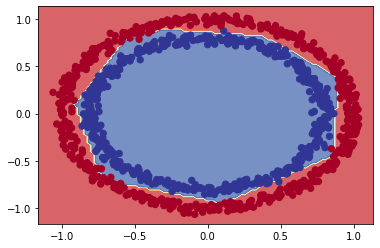

In [35]:
# How do our pridiction look like
plot_decision_boundary(model=model_8,X=X,y=y)

🤔 **Question :**Whats wrong with the prediction we have made ? Are we really evaluating our model correctly ? Hint: what data did the model learn on what data we priduct on ?

🔑 **Note:** The combinayion of **linear (staright lines) and non-linear (non-straight lines) function** is one of the key fundamental of neural network.

Now we have discussed the concept of linear and non-linear functions (or lines) , lets see them in action

In [36]:
# Create a toy tensor ( similar to the data we pass into our models)
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

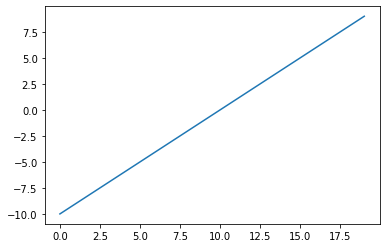

In [37]:
# visualize our toy tensor
plt.plot(A)

In [38]:
# Lets start by replicating sigmoid   sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# use the sigmoid function on our toy function
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

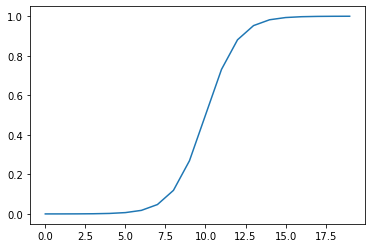

In [39]:
# plot our toy tensor transformed by sigmoid 
plt.plot(sigmoid(A))

In [40]:
# lets recreate the relu function
def relu(x):
  return tf.maximum(0,x)

# Lets pass our toy function to custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

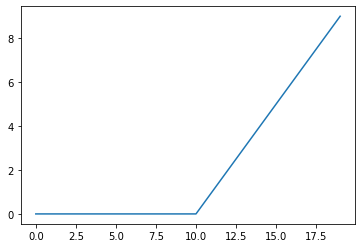

In [41]:
# plot our toy tensor trasformed relu fucntion
plt.plot(relu(A))

In [42]:
# lets try the linear anctivation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

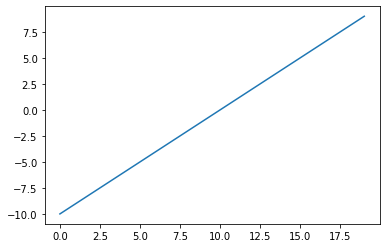

In [43]:
# Does the linear activation function change anything 
plt.plot(tf.keras.activations.linear(A));

In [44]:
# Does A even changes?
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classcification 

so far have been training and testing on the same dataset ....

However this is basically a sin.

so lets create a training and test set

In [45]:
# check how many exampples we have 
len(X)

1000

In [46]:
# Split into train and test sets
X_train, y_train=X[:800], y[:800]
X_test, y_test=X[800:],y[800:]

X_train.shape, X_test.shape,y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [47]:
# lets recreate a model to fit on the training data and evaluate on the testing data 

# set the random seed
tf.random.set_seed(42)

# 1. create a model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(1,tf.keras.activations.sigmoid)
])

# compile a model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])

# fit the model
history=model_9.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 962us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 980us/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/

In [48]:
# Evaluate the model on test datatest
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classcification
doing binary classcification


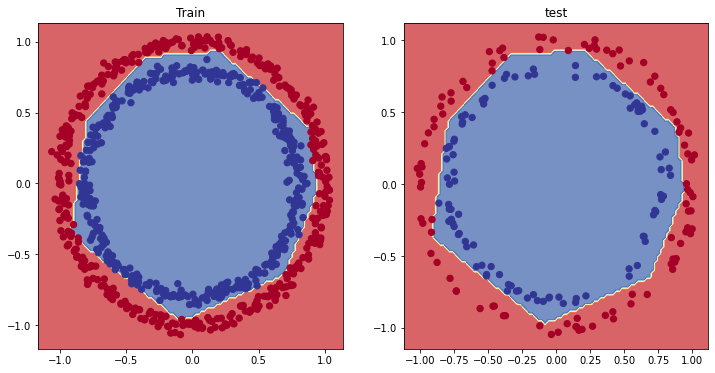

In [49]:
# plot the decision boundry for training and tests sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_9,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model=model_9,X=X_test,y=y_test)

## Plot the loss(or training ) Curve

In [50]:
# convert the history object into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_9 loss curves')

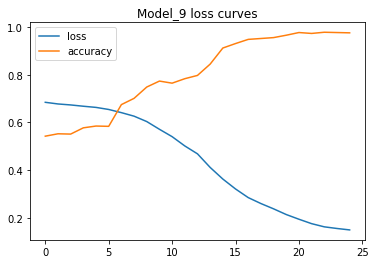

In [51]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_9 loss curves")


🔑 **Note:** For many problems, the loss function going doing means the model is improving ( the prediction its making are getting closser to the ground truth labels)

## Finding the best learning rate
To find the ideal learning rate ( learning rate where loss decreases the most during the training ) we are going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* it's training 
* Another model (we could use the same one as above , but we are practicing building models here)
* A modified loss curves plots.


In [52]:
# set a random seed
tf.random.set_seed(42)

# 1. Create a model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(1,tf.keras.activations.sigmoid)
])

# 2.compile a model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# 3. fit the model
history_10=model_10.fit(X_train,
             y_train,
             epochs=100,
             callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 977us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 907us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 955us/step - loss: 0.6871 - accuracy: 0.5050
Epo

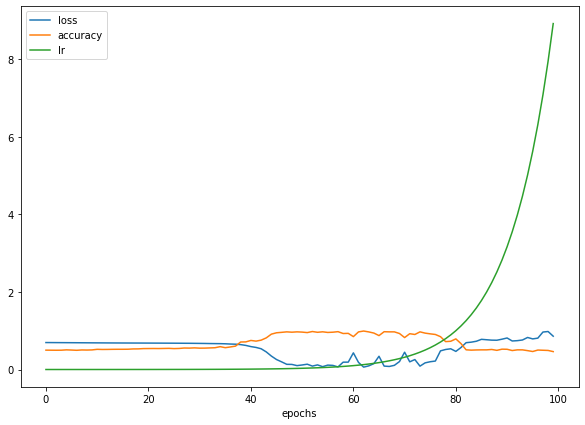

In [53]:
# Checkout the history
pd.DataFrame(history_10.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

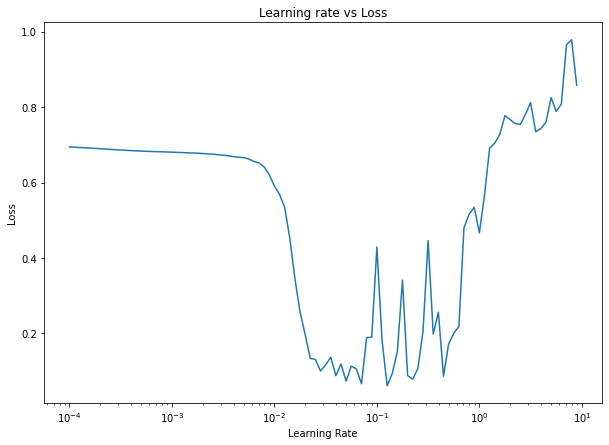

In [54]:
lrs=1e-4 *(10** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_10.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")


In [55]:
# example of typical learning rate
10**0 , 10**-1  , 10**-2  , 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [56]:
# lets try  a higher  *ideal* learning rate with same model as before

# Set random seed
tf.random.set_seed(42)

# 1. craete a model
model_11=tf.keras.Sequential([
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(1,tf.keras.activations.sigmoid)
])

# 2 compile a model
model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# 3. fit the model
history_11=model_11.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 922us/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 944us/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 982us/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
2

In [57]:
# Evaluate the model 11on the test data
model_11.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

In [58]:
# Evaluate the model 9 on test data
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classcification
doing binary classcification


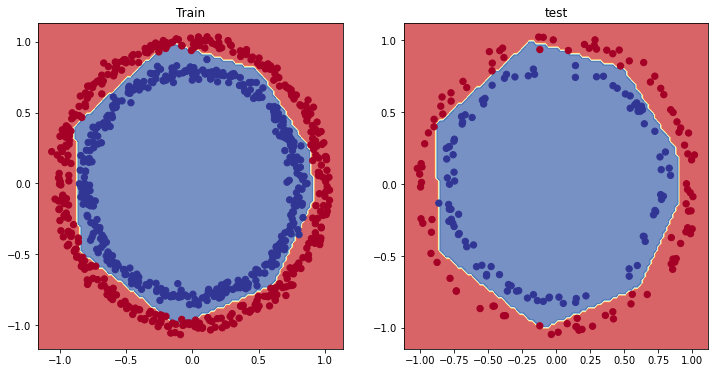

In [59]:
# Plot the dicision boundries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_11,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model=model_11,X=X_test,y=y_test)
plt.show()

##  More classcification and evaluation methods
Alongside visualizing our models results as much as possible, there are handful of other classcifiaction evaluation methods & metrics you should be familiar with:

* Accuracy 
* Precesion
*  Recall
* F1-score
* Confusion metrix
* Classcifiacation report ( from scikit-learn )- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html



In [60]:
loss, accuracy=model_11.evaluate(X_test,y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set:0.05740181356668472
Model accuracy on the test set:99.00%


How about confusion metrix?

In [61]:
# Craete a confusion metrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds=model_11.predict(X_test)

# Create a confusion metrics
confusion_matrix(y_test,y_preds)

ValueError: ignored

In [62]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [63]:
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032342e-01],
       [9.9706948e-01],
       [3.9622939e-01],
       [1.8126905e-02],
       [9.6829063e-01],
       [1.9746751e-02],
       [9.9967170e-01],
       [5.6454539e-04]], dtype=float32)

Oops..looks like our predictions array has come out in **prediction probability** form... the standard output form the sigmoid ( or softmax ) activation functions.

In [64]:
# Convert prediction probabilities to binary format and view first 10 
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [65]:
# Create a confusion metrix
confusion_matrix(y_test,tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

How about we pretify our confusion metrix ?

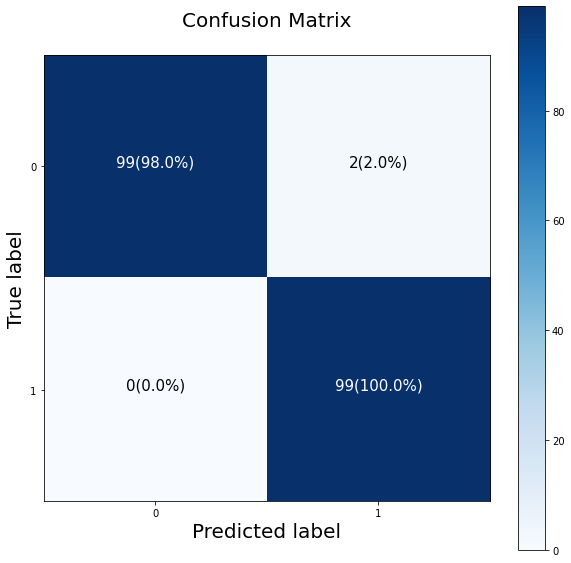

In [66]:
# Note : the confusion materix code we are about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/metrics/_plot/confusion_matrix.py#L443
import itertools
figsize=(10,10)

# Create the confusion materix
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_normal=cm.astype ("float")/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion metrix
n_classes =cm.shape[0]

# Lets pretiffy it
fig, ax=plt.subplots(figsize=figsize)

#  create a matrixs plot
cax=ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes 
classes=False

if classes :
  labels=classes
else:
  labels=np.arange (cm.shape[0])

# label the axis 
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Ste x-axis labels to bottom 
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust labels size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set the thresh hold for different colors
threshold=(cm.max()+cm.min())/2.

# Plot the text in each cell
for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]}({cm_normal[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)



# Working with larger example (Multiclass-classification)

When you have more than two classes as an option , its known as **multiclass-classification**
* This means if you have three different classes, its multiclassification.
* It also means if you have 100 different classification. its multiclass classification.

To practice  multi-class classification, we are going to build a neural network to classify imges of different items of clothing.


**Labels**

Each training and test example is assigned to one of the following labels:

`Label	Description:`
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [67]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#  The data has already been sorted into training and test sets
(train_data, train_labels),(test_data, test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [68]:
# Show the first example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training example\n{test_data[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [69]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

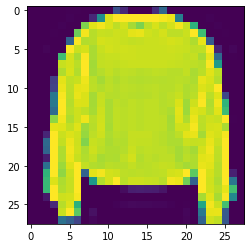

In [70]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [71]:
# Chech out the sample label
train_labels[7]

2

In [72]:
# Create a  small list so we can index onto our training labels so they are human readable 
class_names=["T-shirt/top"  , "Trouser" , "Pullover"  , "Dress" , "Coat"  , "Sandal"  , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"  ]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

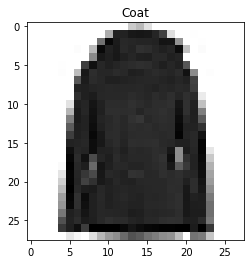

In [73]:
# Plot an example image and its label
index_of_choice=2000
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

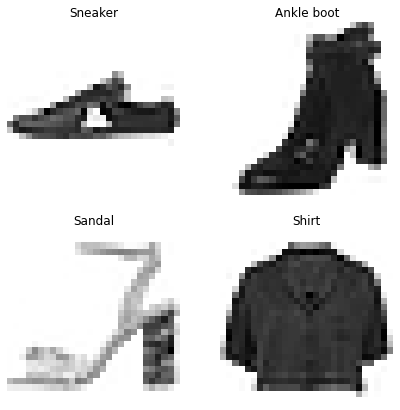

In [79]:
# plot multiple random images of fashion minist
import random
plt.figure(figsize=(7,7))
for i in range (4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model
For our multi-class classification model, we use similar architecture to our binary classifier , however, we are going to have to tweak few things :
* Input shape=28 x28 ( the shape of one image )
* Output shape=10 (one per class of clothing)
* Loss Function = tf.keras.losses.CategoricalCrossentropy()
  *  If your labels are one-hot encoded, use CategorialCrosentropy()
  *  If your labels are integer form use SparseCategorialCrosentropy()
* Output layer activation=Softmax( not sigmoid)


In [75]:
# Our data needs to be flattened (from 28 x 28  to None,784)
flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [76]:
28*28

784

In [77]:
tf.one_hot(train_labels[:10],depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [78]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model
model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])
# 2. Compile a model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#  3. fit the model
non_norm_history=model_12.fit(train_data,
                              tf.one_hot(train_labels,depth=10),
                              epochs=10,
                              validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1588 - accuracy: 0.1634 - val_loss: 1.7726 - val_accuracy: 0.2123
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7000 - accuracy: 0.2530 - val_loss: 1.6434 - val_accuracy: 0.2845
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6281 - accuracy: 0.2812 - val_loss: 1.6045 - val_accuracy: 0.2853
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6055 - accuracy: 0.2835 - val_loss: 1.6178 - val_accuracy: 0.2838
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6083 - accuracy: 0.2845 - val_loss: 1.5945 - val_accuracy: 0.2868
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5882 - accuracy: 0.2873 - val_loss: 1.5755 - val_accuracy: 0.2831
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5807 - accuracy: 0.3056 - val_loss: 1.5792 - val_accuracy:

In [81]:
# Check the model summary
model_12.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_27 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural network data to be scaled (or normalized ), this means they are like to have the numbers in the tensors they try to find petterns between 0 & 1.

In [83]:
# we get our training and testing data between 0 & 1 y dividing the maximum 
train_data_norm= train_data/255.0
test_data_norm= test_data/255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [88]:
from tensorflow.python.keras.layers.core import Flatten
# Now our data is normalized , lets build a model to find a patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model
model_13=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(4,tf.keras.activations.relu),
    tf.keras.layers.Dense(10,tf.keras.activations.softmax)
])
#Compile the mode
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
norm_history=model_13.fit(train_data_norm, 
                        train_labels
                          ,epochs=10
                          ,validation_data=(test_data_norm,test_labels) )


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

>🔑 **Note:**Neural Network tends to perfer data in numerical form as well as scaled /normalized (numbers between 0 & 1). 

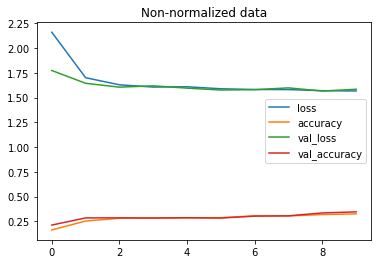

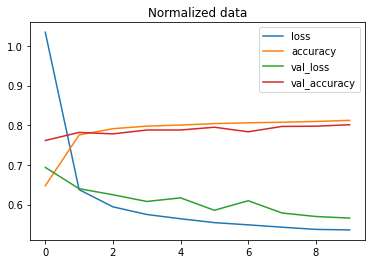

In [89]:
import pandas as pd 
# PLot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot the normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")


> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* differenet results . so when you are comparing models, its important to make sure you are comparing them on same criteria (e.g same architecture but differnt data or same data but different architecture).

## Finding the ideal learning rate 

In [101]:
from tensorflow.python.keras import activations
# Set the random seed
tf.random.set_seed(42)
 
# Create a model
model_14=tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(4,tf.keras.activations.relu),
      tf.keras.layers.Dense(4,tf.keras.activations.relu),
      tf.keras.layers.Dense(10,tf.keras.activations.softmax)
])
# Compile a mode
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20) )

# Fit the model
find_lr_history=model_14.fit(train_data_norm,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data_norm,test_labels),
                            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

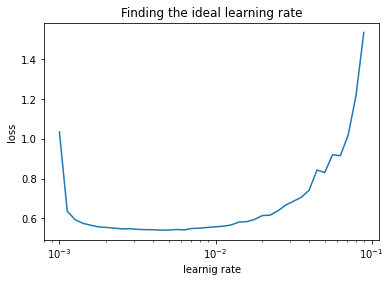

In [102]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("learnig rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")

In [103]:
10**-3

0.001

In [111]:
# Lets refit the model with ideal learning rate 

# set random seed
tf.random.set_seed(42)

# Crate a model
model_15=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,tf.keras.activations.relu),
        tf.keras.layers.Dense(4,tf.keras.activations.relu),
        tf.keras.layers.Dense(10,tf.keras.activations.softmax)
])

# Compile a model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])
history_15=model_15.fit(train_data_norm,
             train_labels,
             epochs=20,
             validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluate our multi-class classification model

To Evaluate our multi-class classification mode we could:
* Evaluate its proformance using other classcification metrics
(such as a confusion mmatrix)
* Assess some of its predictions (through visualization ).
* Improve its results (by training its longer or changing the architecture )
* Save and Export it for use in application  

Lets go through the top 2...

In [113]:
# Note : the confusion materix code we are about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/metrics/_plot/confusion_matrix.py#L443
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_metrics(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):

  # Create the confusion materix
  cm=confusion_matrix(y_true,y_pred)
  cm_normal=cm.astype ("float")/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion metrix
  n_classes =cm.shape[0]

  # Lets pretiffy it
  fig, ax=plt.subplots(figsize=figsize)

  #  create a matrixs plot
  cax=ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set label to be classes 
  if classes :
    labels=classes
  else:
    labels=np.arange (cm.shape[0])

  # label the axis 
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Ste x-axis labels to bottom 
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust labels size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set the thresh hold for different colors
  threshold=(cm.max()+cm.min())/2.

  # Plot the text in each cell
  for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]}({cm_normal[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=text_size)

In [114]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [117]:
# Make some predictions with our model

y_probs= model_15.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]


array([[8.5630648e-11, 3.5361707e-13, 2.6633938e-05, 4.6356391e-08,
        5.0950013e-05, 9.6119173e-02, 8.1778687e-08, 9.1868781e-02,
        4.0605250e-03, 8.0787385e-01],
       [3.4278489e-06, 1.2899068e-16, 9.5989150e-01, 2.0516178e-07,
        1.5329216e-02, 2.4532668e-13, 2.4142856e-02, 1.1383710e-28,
        6.3272106e-04, 4.4790067e-08],
       [6.1062652e-05, 9.9657673e-01, 4.3866638e-08, 3.3405691e-03,
        1.3249359e-05, 1.4383215e-21, 8.2789738e-06, 7.3237463e-18,
        5.4810979e-08, 4.9225330e-14],
       [7.5031152e-05, 9.9053699e-01, 4.2528293e-07, 9.2231436e-03,
        1.3623026e-04, 1.8276022e-18, 2.6808068e-05, 4.8123828e-14,
        1.4521424e-06, 2.2211379e-11],
       [7.2190002e-02, 1.5495694e-06, 2.5566885e-01, 1.0363107e-02,
        4.3541290e-02, 1.1069304e-13, 6.1693025e-01, 6.7543135e-23,
        1.3049151e-03, 1.2140383e-09]], dtype=float32)

> 🔑 **Note:** Remember to make prodiction to same kind of data your model was trained on (e.g if your model was trained on normalized data you will want to make predictions on  normalized data ).

In [122]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5630648e-11, 3.5361707e-13, 2.6633938e-05, 4.6356391e-08,
        5.0950013e-05, 9.6119173e-02, 8.1778687e-08, 9.1868781e-02,
        4.0605250e-03, 8.0787385e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [125]:
# Convert all the prediction probabilities into integers 
y_preds= y_probs.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [126]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)


array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

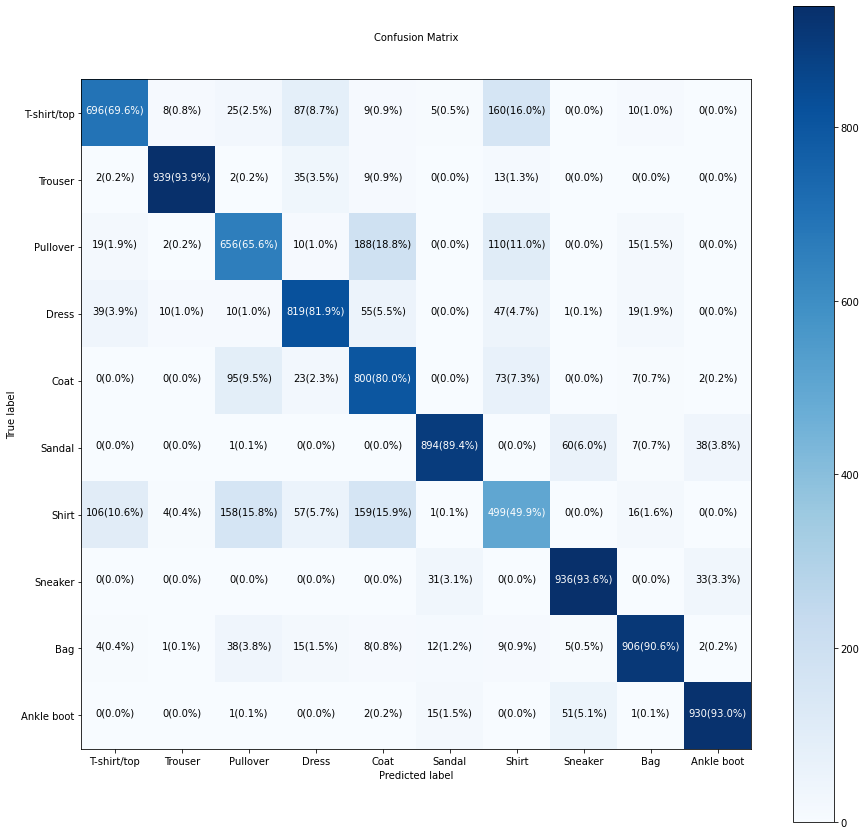

In [136]:
# Make a prettier confusion  metrix
make_confusion_metrics(y_true=test_labels,
                       y_pred=y_preds,
                       classes=class_names,
                       figsize=(15,15),
                       text_size=10)

>🔑 **Note:** Often when working with images and other forms of visual data, its a good idea to visualize as much as possible to develop futher understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make prediction on said image
* Label a plot with truth label & prediction label 

In [147]:
import random
def plot_random_image(model, images,true_labels,classes):
  """
  Picks a random image plots it and labels it with a prediction and truth label.
  """
  # Set up a random integer
  i=random.randint(0,len(images)) 
  
  # Create predictions and targets 
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label =classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  # Plot the image 
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label==true_label :
    color="green"
  else:
    color="Red"
  
  #Add xlabel information(prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format (pred_label,
                                              100*tf.reduce_max(pred_probs),
                                              true_labels)
                                              ,color=color)# set  the color to green or red based on if prediction is right or wrong


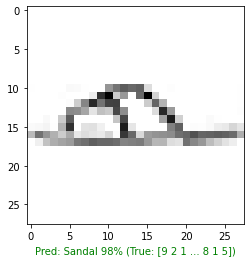

In [158]:
# Check out a random image as well as its predictions
plot_random_image(model=model_15,
                  images=test_data_norm, # Always make same kind of data your model was traied on 
                  true_labels=test_labels,
                  classes=class_names)

## What pattrens is our model learning?


In [159]:
# Find the layers of our most recent model
model_15.layers

In [160]:
# Extract a particular layer
model_15.layers[1]

In [165]:
# Get the pattern of a layer in our network
weights, biases=model_15.layers[1].get_weights()

# Shapes
weights,weights.shape

(array([[ 0.7150262 , -0.06077095, -0.9976309 , -1.048431  ],
        [ 0.27732122, -0.47155392, -0.5291645 ,  0.02329265],
        [ 0.77524287,  0.54027593, -1.1288569 , -0.7426153 ],
        ...,
        [-0.3945346 ,  0.47628674, -0.22641535,  0.2550592 ],
        [-0.40515798,  0.6181011 ,  0.2392843 , -0.5038762 ],
        [ 0.23884575,  0.11606891, -0.12131335,  0.04352421]],
       dtype=float32), (784, 4))

In [166]:
28*28


784

In [167]:
model_15.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_77 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_78 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now check out the bias vector...

In [168]:
biases , biases.shape

(array([ 2.4485858e-02, -6.1471452e-04, -2.7230176e-01,  8.1124890e-01],
       dtype=float32), (4,))

Every neuron has bias vector . Ecah of these is paired with a weights matrix

The Bias vector get initialized as zeros (atleast in the case of a TensorFlow Dense layer ).

The Bias vector dictates how much the pattern within the corresponding weights matix should influence the next layer 


In [170]:
model_15.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_77 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_78 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


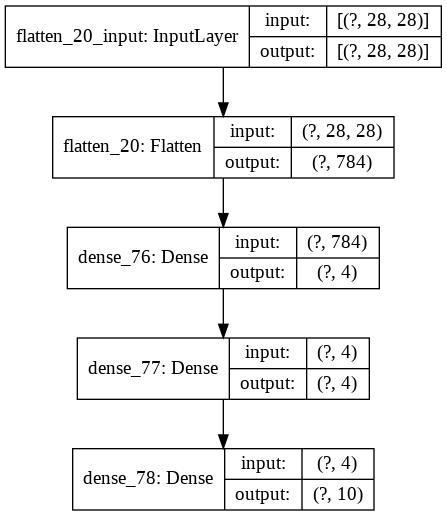

In [173]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_15,show_shapes=True )
